1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


shape of the matrix (3, 1000)
eigenvalues of X  [2.52519816e+01 1.79175416e-15 2.01123737e+00]
eigenvectors of X  [[-0.11861559 -0.81649658  0.56503423]
 [-0.57340718 -0.40824829 -0.71030806]
 [-0.81063836  0.40824829  0.41976039]]
eigenvalues of X with SVD  [1.58859701e+02 4.48837986e+01 1.47647416e-14]
eigenvectors of X with SVD  [[-0.11844085  0.56507088 -0.81649658]
 [-0.57362681 -0.7101307  -0.40824829]
 [-0.81050851  0.42001106  0.40824829]]
NOTE: SAME EIGENVECTOR, SLIGHTLY DIFFERENT EIGENVALUES BECAUSE OF DIFFERNET PRECISION
Percent of the total variability is explained by the principal components  0.9262289104966378
NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED
(2, 2)
Percent of the total variability is explained by the principal components  0.9999999999999999
NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED
eigenvalues of Xp with SVD  [1.58859701e+02 4.48837986e+01 3.8064

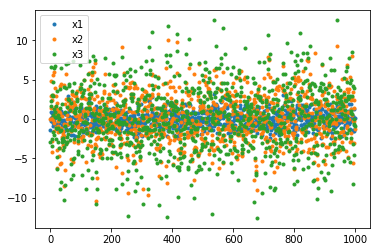

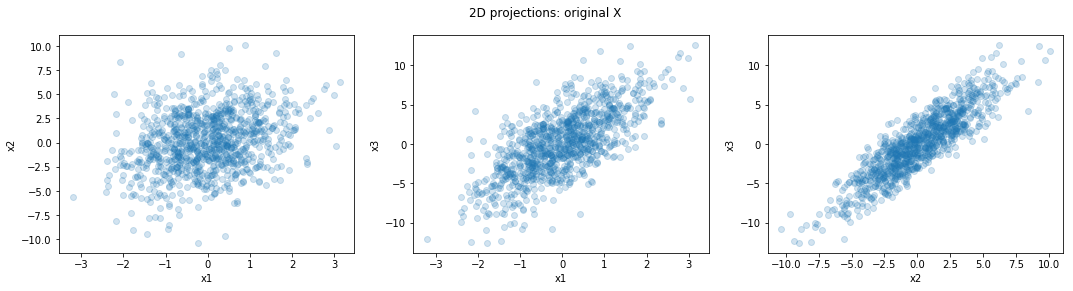

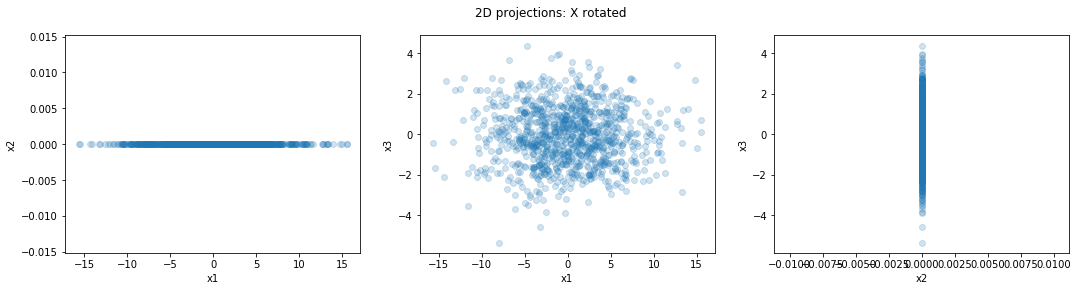

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
%matplotlib inline

# 1

N = 1000
mu, sigma = 0, 1 # mean and standard deviation
x1 = np.random.normal(mu, sigma, N)
mu, sigma = 0, 3 # mean and standard deviation
x2 = x1 + np.random.normal(mu, sigma, N)
x3 = 2*x1 + x2

# 2

X = np.array([x1, x2, x3])
print('shape of the matrix', X.shape)
l, V = np.linalg.eig(np.cov(X))
print('eigenvalues of X ', l)
print('eigenvectors of X ', V)
plt.plot(x1, '.')
plt.plot(x2, '.')
plt.plot(x3, '.')
plt.legend(['x1', 'x2', 'x3'])

# 3

U, D, Vt = la.svd(X)
l_svd = D
V_svd = U

print('eigenvalues of X with SVD ', l_svd)
print('eigenvectors of X with SVD ', V_svd)
print('NOTE: SAME EIGENVECTOR, SLIGHTLY DIFFERENT EIGENVALUES BECAUSE OF DIFFERNET PRECISION')

np.allclose(l, l_svd)
np.allclose(V, V_svd)

# 4

Lambda=np.diag(l) # big lambda
print ("Percent of the total variability is explained by the principal components ", Lambda[0,0]/Lambda.trace()) # taking 93.6% of the overall variability of our dataset
print("NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED")

Lambda=np.diag(l[0:2]) # taking only two largest eigenvalues
print(Lambda.shape)
print ("Percent of the total variability is explained by the principal components ", Lambda[0,0]/Lambda.trace())
print("NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED")

# 5
# generates new coordinates
# rotate all the data points accordingly to the new base
Xp = np.dot(V.T, X)

U, D, Vt = la.svd(Xp)
l_svd = D
V_svd = U
print('eigenvalues of Xp with SVD ', l_svd)
print('eigenvectors of Xp with SVD ', V_svd)
Lambda=np.diag(l_svd) # big lambda
print ("Percent of the total variability is explained by the principal components ", Lambda[0,0]/Lambda.trace())

# 6
fig, ax = plt.subplots(1, 3, figsize=(18,4))
# original
x1 = X[0,:]
x2 = X[1,:]
x3 = X[2,:]
plt.suptitle('2D projections: original X')
ax[0].scatter(x1, x2, alpha=0.2)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[1].scatter(x1, x3, alpha=0.2)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x3')
ax[2].scatter(x2, x3, alpha=0.2)
ax[2].set_xlabel('x2')
ax[2].set_ylabel('x3')
plt.show()
# new coordinates
xn1 = Xp[0,:]
xn2 = Xp[1,:]
xn3 = Xp[2,:]
fig, ax = plt.subplots(1, 3, figsize=(18,4))
plt.suptitle('2D projections: X rotated')
ax[0].scatter(xn1, xn2, alpha=0.2)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[1].scatter(xn1, xn3, alpha=0.2)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x3')
ax[2].scatter(xn2,xn3, alpha=0.2)
ax[2].set_xlabel('x2')
ax[2].set_ylabel('x3')
plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

shape of the matrix (3, 1000)
eigenvalues of X  [25.31884976  0.28521923  2.00580567]
eigenvectors of X  [[-0.12330425 -0.81385513  0.56783439]
 [-0.57548465 -0.40751844 -0.70904594]
 [-0.80846366  0.41420835  0.41811238]]
eigenvalues of X with SVD  [159.07945982  44.82825204  16.89860302]
eigenvectors of X with SVD  [[-0.12318746  0.56697874 -0.81446913]
 [-0.57579183 -0.70928452 -0.40666846]
 [-0.80826271  0.41886822  0.41383668]]
NOTE: SAME EIGENVECTOR, SLIGHTLY DIFFERENT EIGENVALUES BECAUSE OF DIFFERNET PRECISION
Percent of the total variability is explained by the principal components  0.9170215393107555
NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED
(2, 2)
Percent of the total variability is explained by the principal components  0.9888603943260151
NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED
eigenvalues of Xp with SVD  [159.07945982  44.82825204  16.89860302]
eigenvector

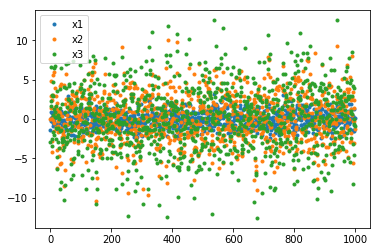

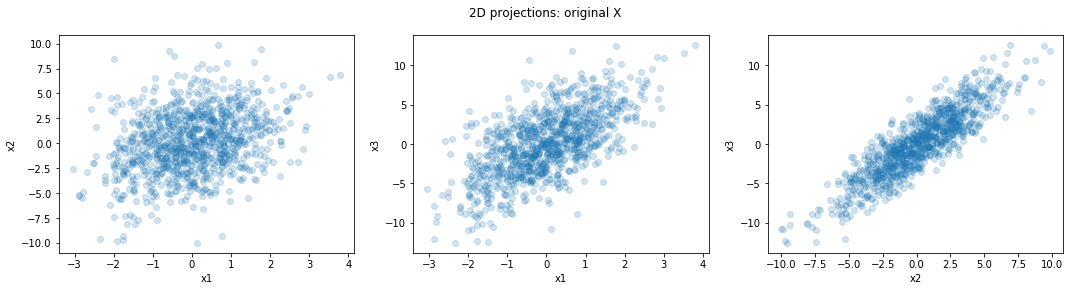

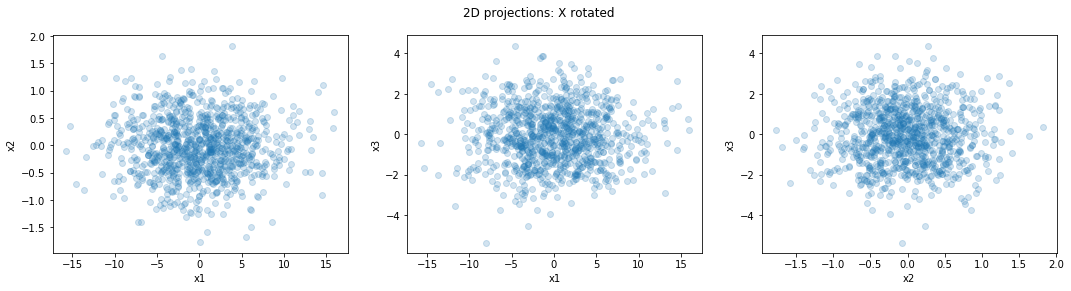

In [2]:
# uncorrelated random noise
c = 1/50
n_noise = 10
sigma = np.diag(np.ones(n_noise)*c)
mu = np.zeros(n_noise)
X_err = np.random.multivariate_normal(mu, sigma, 1000).T
X_err = np.sum(X_err, axis=0)
X = X_err + np.array([x1, x2])
X = np.reshape(np.append(X, x3),(3,N))
# COPIED FROM ABOVE, adding noise changes the plots in the second row

print('shape of the matrix', X.shape)
l, V = np.linalg.eig(np.cov(X))
print('eigenvalues of X ', l)
print('eigenvectors of X ', V)
plt.plot(x1, '.')
plt.plot(x2, '.')
plt.plot(x3, '.')
plt.legend(['x1', 'x2', 'x3'])

# 3

U, D, Vt = la.svd(X)
l_svd = D
V_svd = U

print('eigenvalues of X with SVD ', l_svd)
print('eigenvectors of X with SVD ', V_svd)
print('NOTE: SAME EIGENVECTOR, SLIGHTLY DIFFERENT EIGENVALUES BECAUSE OF DIFFERNET PRECISION')

np.allclose(l, l_svd)
np.allclose(V, V_svd)

# 4

Lambda=np.diag(l) # big lambda
print ("Percent of the total variability is explained by the principal components ", Lambda[0,0]/Lambda.trace()) # taking 93.6% of the overall variability of our dataset
print("NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED")

Lambda=np.diag(l[0:2]) # taking only two largest eigenvalues
print(Lambda.shape)
print ("Percent of the total variability is explained by the principal components ", Lambda[0,0]/Lambda.trace())
print("NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED")

# 5
# generates new coordinates
# rotate all the data points accordingly to the new base
Xp = np.dot(V.T, X)

U, D, Vt = la.svd(Xp)
l_svd = D
V_svd = U
print('eigenvalues of Xp with SVD ', l_svd)
print('eigenvectors of Xp with SVD ', V_svd)
Lambda=np.diag(l_svd) # big lambda
print ("Percent of the total variability is explained by the principal components ", Lambda[0,0]/Lambda.trace())

# 6
fig, ax = plt.subplots(1, 3, figsize=(18,4))
# original
x1 = X[0,:]
x2 = X[1,:]
x3 = X[2,:]
plt.suptitle('2D projections: original X')
ax[0].scatter(x1, x2, alpha=0.2)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[1].scatter(x1, x3, alpha=0.2)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x3')
ax[2].scatter(x2, x3, alpha=0.2)
ax[2].set_xlabel('x2')
ax[2].set_ylabel('x3')
plt.show()
# new coordinates
xn1 = Xp[0,:]
xn2 = Xp[1,:]
xn3 = Xp[2,:]
fig, ax = plt.subplots(1, 3, figsize=(18,4))
plt.suptitle('2D projections: X rotated')
ax[0].scatter(xn1, xn2, alpha=0.2)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[1].scatter(xn1, xn3, alpha=0.2)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x3')
ax[2].scatter(xn2,xn3, alpha=0.2)
ax[2].set_xlabel('x2')
ax[2].set_ylabel('x3')
plt.show()


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


[174 145 147 198 194  89 229  19 295  58] [ 22 118 154 118 214  48 205 137 266 159]
(3, 1000)
(3, 1000)
(3, 1000)


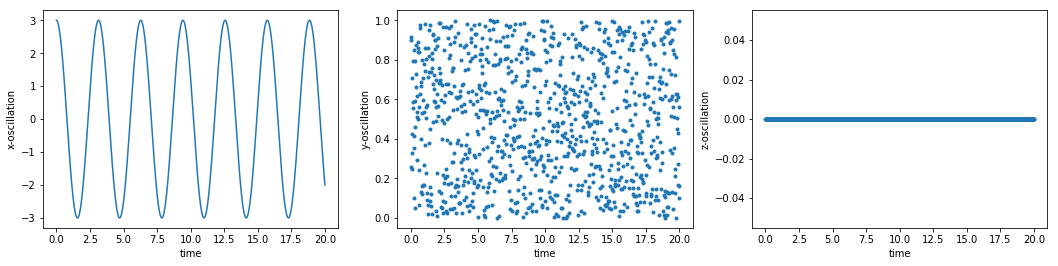

In [3]:
# compute rotation matrix for tetha and gamma
def Rx(angle):
    s = np.sin(angle)
    c = np.cos(angle)
    return [[1, 0,  0],
             [0, c, -s],
             [0, s,  c]]
def Ry(angle):
    s = np.sin(angle)
    c = np.cos(angle)
    return [[c,  0, s],
             [0,  1, 0],
             [-s, 0, c]]

# no rotation along z
# def Rz(angle):
#     s = np.sin(angle)
#     c = np.cos(angle)
#     return [[c, -s, 0],
#              [s,  c, 0],
#              [0,  0, 1]]

n = 10 # number of cameras looking at a spring osciallating along the x axis
n_records = 1000
tetha, gamma = np.random.randint(0,360,n), np.random.randint(0,360,n) # camera looking direction
print(tetha, gamma)
# tetha, gamma = np.deg2rad(tetha), np.deg2rad(gamma)

fi = 0
A = 3
w = 2
t = np.linspace(0,20,n_records)
x = A*np.cos(w*t-fi)
y = np.random.uniform(size=n_records) # random noise in y
z = np.zeros(n_records)

X = np.array([x, y, z])
print(X.shape)
# X = X.reshape(3,n_records).T
# print(X[0])

fig, axes = plt.subplots(1, 3, figsize=(18,4))
axes[0].set_xlabel('time')
axes[0].set_ylabel('x-oscillation')
axes[0].plot(t,X[0,:])

axes[1].plot(t,X[1,:],'.')
axes[1].set_xlabel('time')
axes[1].set_ylabel('y-oscillation')
print(X.shape)

axes[2].plot(t,X[2,:],'.')
axes[2].set_xlabel('time')
axes[2].set_ylabel('z-oscillation')
print(X.shape)

(3, 1000)
motions wrt cameras


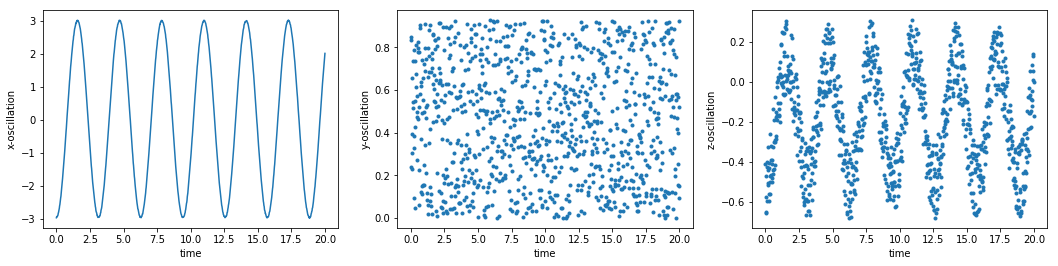

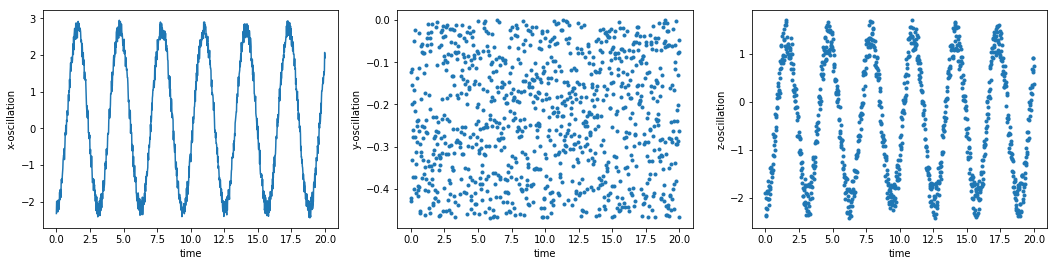

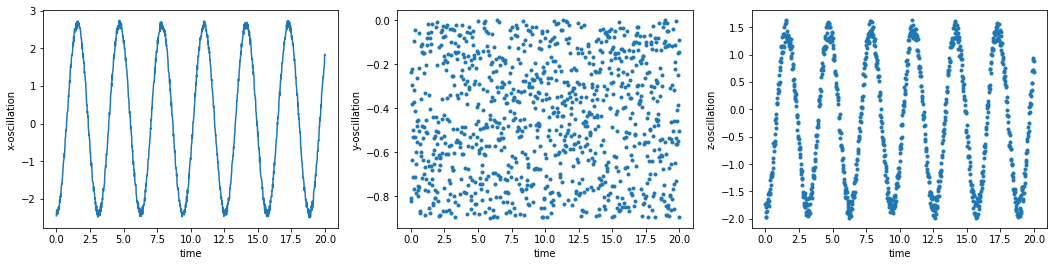

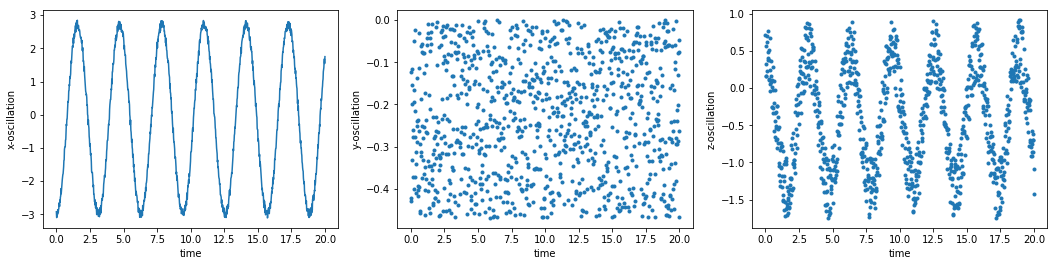

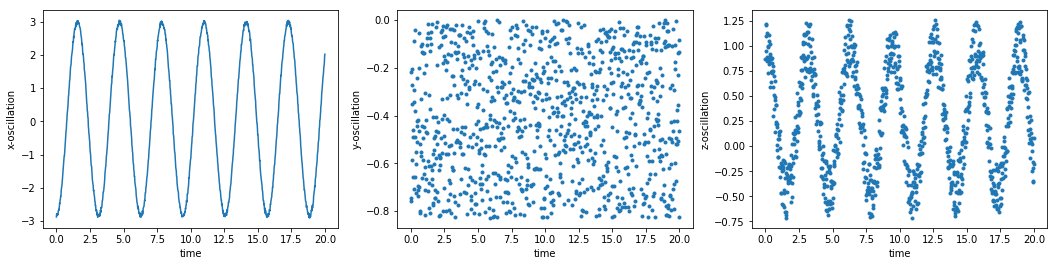

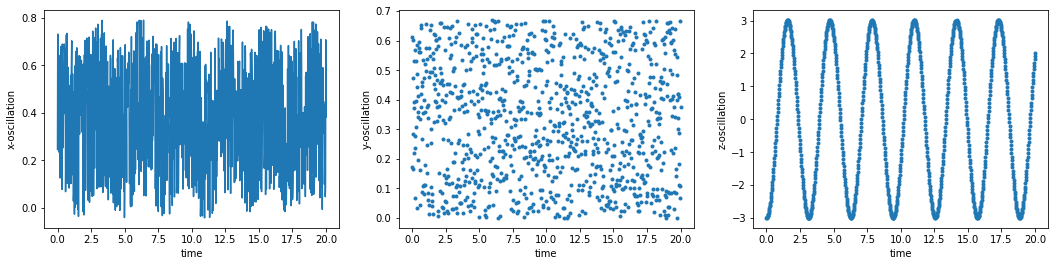

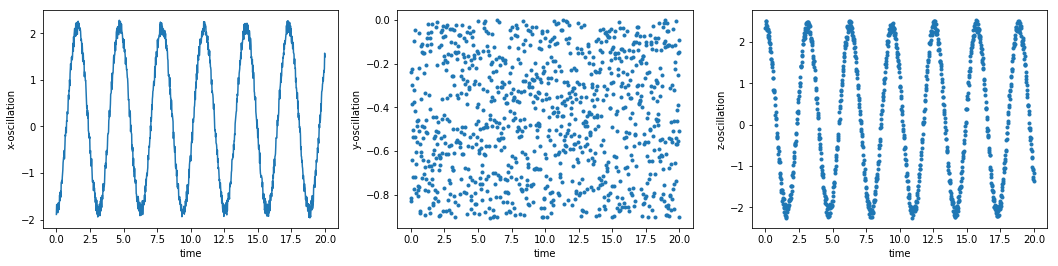

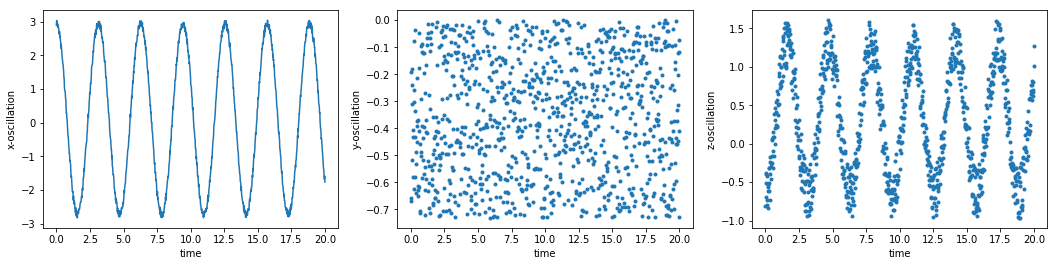

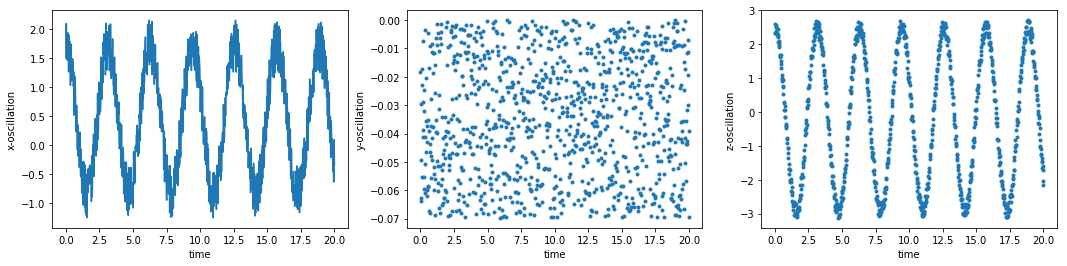

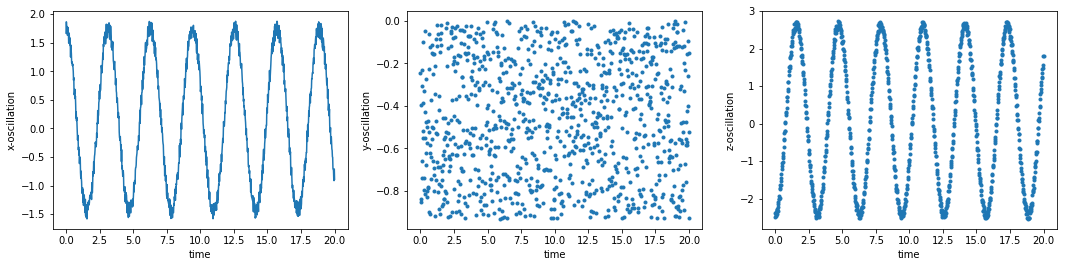

In [4]:
X_rot = []
for ang1, ang2 in zip(np.deg2rad(tetha), np.deg2rad(gamma)):
    R = np.dot(Ry(ang1), Rx(ang2))
    X_rot.append(np.dot(R,X))
print(X_rot[0].shape)

print('motions wrt cameras')
for X in X_rot:    
    fig, axes = plt.subplots(1, 3, figsize=(18,4))
    axes[0].set_xlabel('time')
    axes[0].set_ylabel('x-oscillation')
    axes[0].plot(t,X[0,:])

    axes[1].plot(t,X[1,:],'.')
    axes[1].set_xlabel('time')
    axes[1].set_ylabel('y-oscillation')

    axes[2].plot(t,X[2,:],'.')
    axes[2].set_xlabel('time')
    axes[2].set_ylabel('z-oscillation')

In [5]:
# PERFORMING PCA
variability = []
for (X, te, ga) in zip(X_rot, tetha, gamma):
    print('angles: tetha, gamma', te, ga)
    # taking only x and y coordinates
    l, V = np.linalg.eig(np.cov(X[:2,:]))
    Lambda=np.diag(l) # big lambda
    variability.append(Lambda[0,0]/Lambda.trace())
    print ("Percent of the total variability is explained by the principal components ", variability[-1])
    print ('\n')
print('best variability', np.max(variability))

angles: tetha, gamma 174 22
Percent of the total variability is explained by the principal components  0.9831620779888705


angles: tetha, gamma 145 118
Percent of the total variability is explained by the principal components  0.993644043170455


angles: tetha, gamma 147 154
Percent of the total variability is explained by the principal components  0.9779084700130887


angles: tetha, gamma 198 118
Percent of the total variability is explained by the principal components  0.9952455636626784


angles: tetha, gamma 194 214
Percent of the total variability is explained by the principal components  0.9858212004195932


angles: tetha, gamma 89 48
Percent of the total variability is explained by the principal components  0.9932655277546649


angles: tetha, gamma 229 205
Percent of the total variability is explained by the principal components  0.9640016429022144


angles: tetha, gamma 19 137
Percent of the total variability is explained by the principal components  0.9883911198338546


angle

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [6]:
data = np.loadtxt('../data/data_000637.txt',skiprows=1,delimiter=",")
print(data.shape)

FileNotFoundError: [Errno 2] No such file or directory: '../data/data_000637.txt'

In [7]:
# print the description. This can (and better) be done from a terminal
!cat ../data/magic04.names

cat: ../data/magic04.names: No such file or directory


In [8]:
import pandas as pd
file_name="../data/magic04.data"
data=pd.read_csv(file_name,nrows=1000)
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']

df = data.drop(columns=['category'])
X = df.values.T
# print(X)

variability = []
l, V = np.linalg.eig(np.cov(X))
print(l.shape)
plt.title('eigenvalues: largest gap = most of variability')
plt.plot(l, '.')
Lambda=np.diag(l) # big lambda
variability.append(Lambda[0,0]/Lambda.trace())
print ("Percent of the total variability is explained by the principal components ", variability[-1])

df = data.drop(columns=['category','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist'])
X = df.values.T
# print(X)

l, V = np.linalg.eig(np.cov(X))
print(l.shape)
plt.plot(l, '.')
Lambda=np.diag(l) # big lambda
variability.append(Lambda[0,0]/Lambda.trace())
print ("Percent of the total variability is explained by the principal components, with less features ", variability[-1])


FileNotFoundError: [Errno 2] File b'../data/magic04.data' does not exist: b'../data/magic04.data'